In [1]:
import pandas as pd
import numpy as np

pd_data = pd.read_csv('C:/Users/water/anaconda3/envs/ml/4. 인공지능/source/ch12/vegeterianl_dataset.csv', delimiter=r"\s+")
pd_data.drop("ID",axis=1)

,STREAM,SLOPE,ELEVATION,VEGETATION
0,False,steep,3900,chapparal
1,True,moderate,300,riparian
2,True,steep,1500,riparian
3,False,steep,1200,chapparal
4,False,flat,4450,conifer
5,True,steep,5000,conifer
6,True,steep,3000,chapparal


In [2]:
pd_data.sort_values("ELEVATION")

,ID,STREAM,SLOPE,ELEVATION,VEGETATION
1,2,True,moderate,300,riparian
3,4,False,steep,1200,chapparal
2,3,True,steep,1500,riparian
6,7,True,steep,3000,chapparal
0,1,False,steep,3900,chapparal
4,5,False,flat,4450,conifer
5,6,True,steep,5000,conifer


In [3]:
#데이터 로딩하고 인덱스 번호인 RID 열 제거
import pandas as pd
import numpy as np
pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data = pd_data.drop("RID",axis=1)
pd_data

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [4]:
#정보 이득 함수 만들기
#y 값의 클래슬르 기준으로 엔트로피 연산 수행
def get_info(df):
    buy = df.loc[df["class_buys_computer"]=="yes"]
    not_buy = df.loc[df["class_buys_computer"]=="no"]
    x = np.array([len(buy)/len(df),len(not_buy)/len(df)])
    y = np.log2(x[x!=0])
    
    info_all = - sum(x[x!=0] * y)
    return info_all

In [5]:
get_info(pd_data)

0.9402859586706311

In [6]:
#속성별 IG(Information Gain) 구하기
#각 속성들의 클래스를 기준으로 데이터를 추출한 후 계산
youth = pd_data.loc[pd_data['age'] == "youth"]
senior = pd_data.loc[pd_data['age'] == "senior"]
middle_aged = pd_data.loc[pd_data['age'] == "middle_aged"]

In [7]:
print(get_info(youth))

0.9709505944546686


In [8]:
print(get_info(senior))

0.9709505944546686


In [9]:
print(get_info(middle_aged))

-0.0


In [10]:
#속성별 IG 연산하는 함수
def get_attribute_info(df, attribute_name):
    attribute_values = pd_data[attribute_name].unique()
    get_infos = []
    for value in attribute_values:
        split_df = pd_data.loc[pd_data[attribute_name] == value]
        
        get_infos.append((len(split_df) / len(df)) * get_info(split_df))
    
    return sum(get_infos)

In [11]:
get_attribute_info(pd_data, "age")

0.6935361388961918

In [12]:
get_info(pd_data) - get_attribute_info(pd_data, "age")

0.24674981977443933

In [13]:
get_info(pd_data) - get_attribute_info(pd_data, "income")

0.02922256565895487

In [14]:
get_info(pd_data) - get_attribute_info(pd_data, "student")

0.15183550136234159

In [15]:
get_info(pd_data) - get_attribute_info(pd_data, "credit_rating")

0.04812703040826949

In [16]:
#IG가 가장 큰 age 속성값을 기준으로 의사결정 트리 가지 생성
youth = pd_data.loc[pd_data['age'] == "youth"]
#youth의 IG 값 - youth에서 income 속성의 IG 값 빼기
get_info(youth) - get_attribute_info(youth, "income")

-1.580026905978025

In [17]:
#값이 가장 크기 떄문에 youth의 경우 student를 기준으로 가지를 생성
get_info(youth) - get_attribute_info(youth, "student")

-1.2367106860085422

In [18]:
get_info(youth) - get_attribute_info(youth, "credit_rating")

-1.527094404679944

In [19]:
#사이킷런과 타이타닉 데이터셋 사용해서 의사결정트리 구현하기
import pandas as pd

train_df = pd.read_csv("C:/Users/water/anaconda3/envs/ml/4. 인공지능/source/ch12/train.csv")
test_df = pd.read_csv("C:/Users/water/anaconda3/envs/ml/4. 인공지능/source/ch12/test.csv")

train_id = train_df["PassengerId"].values
test_id = test_df["PassengerId"].values

all_df = train_df.append(test_df).set_index('PassengerId')
all_df

C:\Users\water\AppData\Local\Temp\ipykernel_1692\1802358282.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = train_df.append(test_df).set_index('PassengerId')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [20]:
#데이터 전처리 - str 값을 int 값으로 변경
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})

#데이터 전처리 - age의 비어있는 값을 class의 평균으로 채운다.
all_df["Age"].fillna(
    all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

In [21]:
all_df["cabin_count"] = all_df["Cabin"].map(
         lambda x : len(x.split()) if type(x) == str else 0)

In [22]:
#사회적 지위 정보를 새로운 변수에 저장
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs" 
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))

In [23]:
all_df["social_status"].value_counts()

Mr        758
Miss      258
Mrs       203
Master     61
0           9
Rev         8
Dr          8
Col         4
Name: social_status, dtype: int64

In [24]:
#사용하지 않을 데이터 삭제 위한 위치 확인- Embarked(출발지에 대한 정보)
all_df[all_df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1,Miss
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1,Mrs


In [25]:
#전체 데이터에서 삭제
all_df = all_df.drop([62,830])
#train data에서도 삭제
train_id =np.delete(train_id, [62-1,830-1])

In [26]:
all_df[all_df["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,0,Mr


In [27]:
all_df.groupby(["Pclass","Sex"])["Fare"].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

In [28]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462

In [29]:
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "99")
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status,cabin_type
PassengerId,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,Mr,99
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,1,Mrs,C
3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,99
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,1,Mrs,C
5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,0,Mr,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",0,24.816367,0,0,A.5. 3236,8.0500,NaN,S,0,Mr,99
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C,1,0,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr,99


In [30]:
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_count,social_status,cabin_type
PassengerId,,,,,,,,,,,
1,0.0,3,0,22.000000,1,0,7.2500,S,0,Mr,99
2,1.0,1,1,38.000000,1,0,71.2833,C,1,Mrs,C
3,1.0,3,1,26.000000,0,0,7.9250,S,0,Miss,99
4,1.0,1,1,35.000000,1,0,53.1000,S,1,Mrs,C
5,0.0,3,0,35.000000,0,0,8.0500,S,0,Mr,99
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,0,24.816367,0,0,8.0500,S,0,Mr,99
1306,NaN,1,1,39.000000,0,0,108.9000,C,1,0,C
1307,NaN,3,0,38.500000,0,0,7.2500,S,0,Mr,99


In [31]:
y = all_df.loc[train_id, "Survived"].values #train label
del all_df["Survived"]

In [32]:
#원핫인코딩과 스케일링 수행
X_df = pd.get_dummies(all_df)
X = X_df.values

In [33]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X)
X = minmax_scaler.transform(X)

In [34]:
#학습 시작
X_train = X[:len(train_id)] #train data
X_test = X[len(train_id):] #test data

<AxesSubplot:>

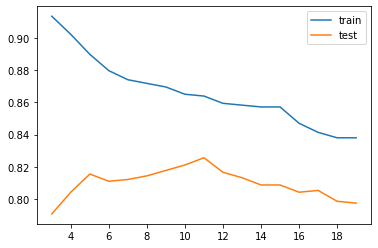

In [35]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score  

test_accuracy = []
train_accuracy = []
for idx in range(3, 20):
    df = DecisionTreeClassifier(min_samples_leaf=idx)
    acc = cross_val_score(df, X_train, y, scoring="accuracy", cv=5).mean()
    train_accuracy.append(
        accuracy_score(df.fit(X_train, y).predict(X_train), y))
    test_accuracy.append(acc)

result = pd.DataFrame(train_accuracy, index=range(3,20), columns=["train"])
result["test"] = test_accuracy

result.plot()

In [36]:
#두 개 이상의 알고리즘과 하이퍼 매개변수 시
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

algorithmes = [LogisticRegression(), DecisionTreeClassifier()]

c_params = [0.1,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]


params = []
params.append([{"solver" : ["saga"],"penalty" : ["l1"],"C" : c_params},
               {"solver" : ['liblinear'],"penalty" : ["l2"],"C" : c_params}
              ])
params.append({"criterion" : ["gini", "entropy"],
               "max_depth" : [10,8,7,6,5,4,3,2],
               "min_samples_leaf": [1,2,3,4,5,6,7,8,9]})

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(algorithmes,params)):
    gs_estimator = GridSearchCV(
            refit="accuracy", estimator=estimator,param_grid=params, 
            scoring=scoring, cv=5, verbose=1, n_jobs=4)

    gs_estimator.fit(X_train, y)
    estimator_results.append(gs_estimator)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [50]:
estimator_results

[GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
              param_grid=[{'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                           'penalty': ['l1'], 'solver': ['saga']},
                          {'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                           'penalty': ['l2'], 'solver': ['liblinear']}],
              refit='accuracy', scoring=['accuracy'], verbose=1),
 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 8, 7, 6, 5, 4, 3, 2],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
              refit='accuracy', scoring=['accuracy'], verbose=1)]

In [38]:
estimator_results[0].best_score_

0.8268075922046594

In [39]:
estimator_results[1].best_score_

0.8358154002412238

In [40]:
import pandas as pd
from pandas import DataFrame
from collections import defaultdict

result_df_dict = {}

result_attributes = ["model", "accuracy", "penalty", "solver", "C", "criterion", "max_depth", "min_samples_leaf"]
result_dict = defaultdict(list)

algorithm_name= ["LogisticRegression", "DecisionTreeClassifier"]

for i, estimators in enumerate(estimator_results):
    number_of_estimators = len(estimators.cv_results_["mean_fit_time"])

    for idx_estimator in range(number_of_estimators):
        result_dict["model"].append(algorithm_name[i])
        result_dict["accuracy"].append(
            estimators.cv_results_["mean_test_accuracy"][idx_estimator])
            
    for param_value in estimators.cv_results_["params"]:
        for k,v in param_value.items():
            result_dict[k].append(v)
    for attr_name in result_attributes:
        if len(result_dict[attr_name]) < len(result_dict["accuracy"]):
            result_dict[attr_name].extend([None for i in range(number_of_estimators)])

In [54]:
result_df = DataFrame(result_dict, columns=result_attributes)
result_df.sort_values("accuracy",ascending=False).head(n=10)

,model,accuracy,penalty,solver,C,criterion,max_depth,min_samples_leaf
137,DecisionTreeClassifier,0.835815,None,None,NaN,entropy,4.0,7.0
135,DecisionTreeClassifier,0.834692,None,None,NaN,entropy,4.0,5.0
139,DecisionTreeClassifier,0.834679,None,None,NaN,entropy,4.0,9.0
138,DecisionTreeClassifier,0.833556,None,None,NaN,entropy,4.0,8.0
133,DecisionTreeClassifier,0.832445,None,None,NaN,entropy,4.0,3.0
132,DecisionTreeClassifier,0.832445,None,None,NaN,entropy,4.0,2.0
136,DecisionTreeClassifier,0.832432,None,None,NaN,entropy,4.0,6.0
102,DecisionTreeClassifier,0.831283,None,None,NaN,entropy,8.0,8.0
119,DecisionTreeClassifier,0.830178,None,None,NaN,entropy,6.0,7.0
66,DecisionTreeClassifier,0.830172,None,None,NaN,gini,4.0,8.0


In [42]:
estimator_results[1].best_estimator_.feature_importances_

array([0.13376524, 0.06257368, 0.04358764, 0.        , 0.        ,
       0.18883257, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04383854, 0.        ,
       0.5138999 , 0.        , 0.        , 0.01350244, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [43]:
X_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

In [44]:
coef = estimator_results[1].best_estimator_.feature_importances_
coef.argsort()[::-1]

array([15,  5,  0,  1, 13,  2, 18, 21,  9, 24,  3,  4, 23,  6,  7,  8, 10,
       20, 11, 12, 25, 14, 22, 16, 17, 19, 26], dtype=int64)

In [45]:
X_df.columns[coef.argsort()[::-1]][:5]

Index(['social_status_Mr', 'Fare', 'Pclass', 'Sex', 'social_status_Master'], dtype='object')

In [46]:
!pip install pydotplus

In [47]:
estimator_results

[GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
              param_grid=[{'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                           'penalty': ['l1'], 'solver': ['saga']},
                          {'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                           'penalty': ['l2'], 'solver': ['liblinear']}],
              refit='accuracy', scoring=['accuracy'], verbose=1),
 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 8, 7, 6, 5, 4, 3, 2],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
              refit='accuracy', scoring=['accuracy'], verbose=1)]

In [48]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

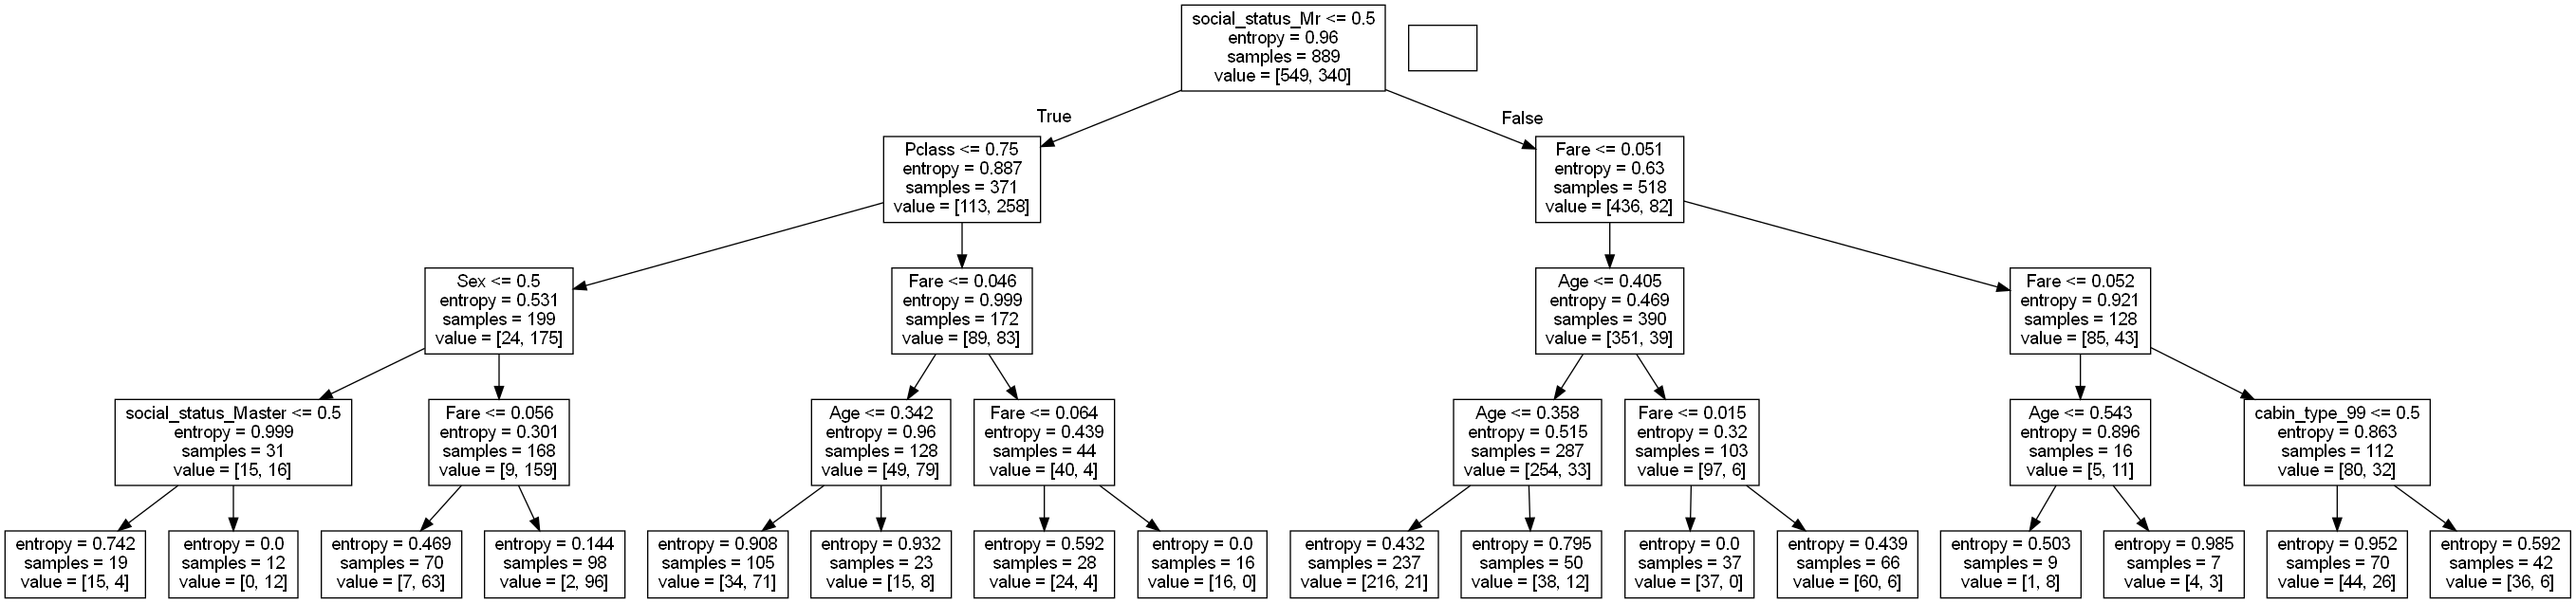

In [49]:
import pydotplus
from six import StringIO
from sklearn import tree

best_tree = estimator_results[1].best_estimator_
column_names = X_df.columns

dot_data = StringIO()
tree.export_graphviz(best_tree, out_file=dot_data, feature_names=column_names) 

graph = pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titanic.png")
from IPython.core.display import Image 
Image(filename='titanic.png')